In [18]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
from scipy.stats import ttest_ind
import statsmodels.api as sm
from numpy import linspace

print("Esperamos trabalhar no diretório")
print(os.getcwd())


Esperamos trabalhar no diretório
C:\Users\Pedro\Documents\Insper\2015.2\Data Science\Projeto 3


In [3]:
cmortality = pd.read_excel("indicator gapminder under5mortality.xlsx")
cmortality

,Under five mortality,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,468.58,468.58,468.58,468.58,468.58,468.58,469.98,469.98,469.98,...,116.30,113.20,110.40,107.60,105.00,102.30,99.50,96.70,93.90,91.10
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,...,19.50,18.70,17.90,17.30,16.60,16.00,15.50,14.90,14.40,14.00
4,Algeria,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,...,32.10,30.70,29.50,28.40,27.40,26.60,25.80,25.20,24.60,24.00
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.70,3.60,3.50,3.40,3.30,3.20,3.10,3.00,2.90,2.80
7,Angola,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,...,200.50,196.40,192.00,187.30,182.50,177.30,172.20,167.10,162.20,156.90
8,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,473.60,469.77,465.97,462.20,458.47,454.76,451.08,447.43,443.82,...,11.80,11.30,10.90,10.40,9.90,9.50,9.10,8.70,8.40,8.10


In [4]:
cmort = cmortality[["Under five mortality"] + [2005]]
cmort

,Under five mortality,2005
0,Abkhazia,NaN
1,Afghanistan,119.60
2,Akrotiri and Dhekelia,NaN
3,Albania,20.50
4,Algeria,33.60
5,American Samoa,NaN
6,Andorra,3.90
7,Angola,203.90
8,Anguilla,NaN
9,Antigua and Barbuda,12.40


In [5]:
fstmarriage = pd.read_excel("indicator age of marriage.xlsx")
fstmarriage

,1616,1666,1685,1710,1716,1735,1760,1766,1775,1780,...,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.839683
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.326509
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,27.6,NaN,NaN,NaN,NaN,NaN,NaN,29.600000
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.263962
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.986034
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.931255
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.937569
Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.886307
Bahamas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.192772


In [6]:
fmar = fstmarriage[[2005]]
fmar

,2005
Afghanistan,17.839683
Albania,23.326509
Algeria,29.600000
Angola,NaN
Argentina,23.263962
Armenia,22.986034
Australia,28.931255
Austria,28.937569
Azerbaijan,23.886307
Bahamas,27.192772


In [7]:
type(cmort)

pandas.core.frame.DataFrame

In [8]:
c = cmort.set_index(["Under five mortality"], drop=True)
c

,2005
Under five mortality,
Abkhazia,NaN
Afghanistan,119.60
Akrotiri and Dhekelia,NaN
Albania,20.50
Algeria,33.60
American Samoa,NaN
Andorra,3.90
Angola,203.90
Anguilla,NaN


In [9]:
pd.ols(x=c[2005],y=fmar[2005])


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         163
Number of Degrees of Freedom:   2

R-squared:         0.4241
Adj R-squared:     0.4205

Rmse:              2.8439

F-stat (1, 161):   118.5457, p-value:     0.0000

Degrees of Freedom: model 1, resid 161

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -0.0535     0.0049     -10.89     0.0000    -0.0632    -0.0439
     intercept    26.7598     0.3087      86.68     0.0000    26.1548    27.3649
---------------------------------End of Summary---------------------------------

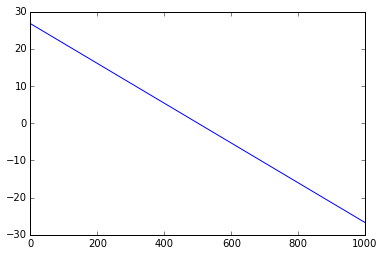

In [10]:
test = range(0,1000)
testy = []
for i in test:
    testy.append(i*(-0.0535)+26.7598)
    
    
plt.plot(test, testy)

#Não ficou bom

In [11]:
sanitation = pd.read_excel("Indicator_Improved sanitation total percent.xlsx")
sanitation

,"Proportion of the population using improved sanitation facilities, total",1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,29,29,29,29,29,29,30,30,...,32,33,34,34,35,35,37,37,37,37
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,76,76,77,77,77,78,79,80,81,...,85,86,87,88,90,91,91,93,94,94
4,Algeria,88,89,89,89,90,90,90,91,91,...,92,93,93,93,94,94,94,95,95,95
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andorra,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
7,Angola,29,29,30,31,33,34,36,38,39,...,44,46,47,49,51,52,54,55,57,58
8,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,NaN,NaN,95,95,95,95,95,95,95,...,95,95,95,95,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
cmort2 = cmortality[["Under five mortality"] + [2010]]
cmort2.set_index(["Under five mortality"])
cmort2

,Under five mortality,2010
0,Abkhazia,NaN
1,Afghanistan,105.00
2,Akrotiri and Dhekelia,NaN
3,Albania,16.60
4,Algeria,27.40
5,American Samoa,NaN
6,Andorra,3.30
7,Angola,182.50
8,Anguilla,NaN
9,Antigua and Barbuda,9.90


In [13]:
sant = sanitation[["Proportion of the population using improved sanitation facilities, total"] + ["2010"]]
sant.set_index(["Proportion of the population using improved sanitation facilities, total"])
sant

,"Proportion of the population using improved sanitation facilities, total",2010
0,Abkhazia,NaN
1,Afghanistan,37
2,Akrotiri and Dhekelia,NaN
3,Albania,94
4,Algeria,95
5,American Samoa,NaN
6,Andorra,100
7,Angola,58
8,Anguilla,NaN
9,Antigua and Barbuda,NaN


In [47]:
regressao = sm.OLS(cmort2[2010],sant["2010"])
regressao = regressao.fit()
regressao.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   2010   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 26 Nov 2015   Prob (F-statistic):                nan
Time:                        16:46:30   Log-Likelihood:                    nan
No. Observations:                 275   AIC:                               nan
Df Residuals:                     275   BIC:                               nan
Df Model:                          -1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
2010              nan        nan        nan        nan           nan       nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                          nan
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Essa bagaça não deu muito certo, vamos usar o nosso bom e velho amiguinho panda :^)

In [21]:
pd.ols(x=cmort2[2010],y=sant["2010"])


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         169
Number of Degrees of Freedom:   2

R-squared:         0.6942
Adj R-squared:     0.6924

Rmse:             16.7230

F-stat (1, 167):   379.1701, p-value:     0.0000

Degrees of Freedom: model 1, resid 167

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -0.5917     0.0304     -19.47     0.0000    -0.6513    -0.5322
     intercept    96.3187     1.7933      53.71     0.0000    92.8037    99.8336
---------------------------------End of Summary---------------------------------

[0.0, 167.0, 0, 96.318700000000007]

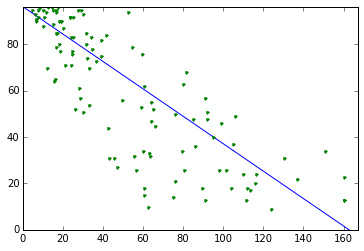

In [48]:
test2 = linspace(0,167, 1000)
testy2 = []

for i in test2:
    testy2.append(i*(-0.5917) + 96.3187)
    
plt.plot(test2, testy2) 
plt.plot(cmort2[2010],sant["2010"], ".")
plt.axis([min(test2), max(test2), 0, max(testy2)])